In [3]:
library(caret)

Warning message:
“package ‘caret’ was built under R version 4.0.5”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [4]:
data(iris)

In [5]:
dataset <- iris

In [7]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

In [8]:
dim(dataset)

[1] 120   5

In [9]:
sapply(dataset,class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [10]:
#first 5 rows of data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [11]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [12]:
#distribution of various classes
percentage <- prop.table(table(dataset$Species))*100
cbind(freq=table(dataset$Species),percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [13]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.250   Median :1.300  
 Mean   :5.832   Mean   :3.053   Mean   :3.741   Mean   :1.207  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

In [14]:
x <- dataset[,1:4]
y <- dataset[,5]

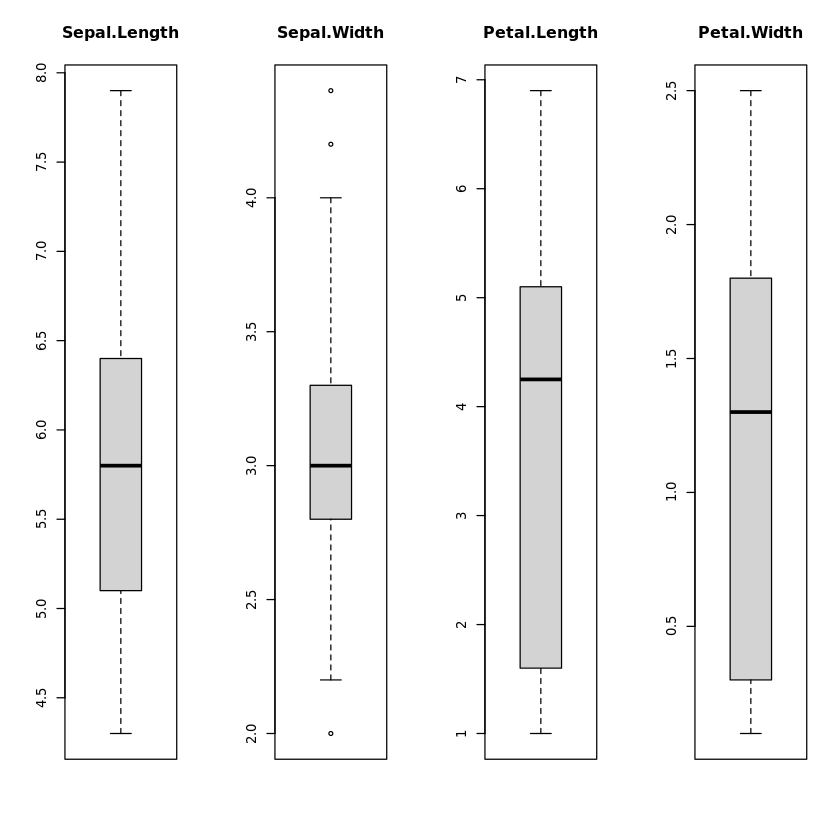

In [15]:
#boxplot for data
par(mfrow=c(1,4))
    for(i in 1:4){
        boxplot(x[,i], main=names(iris)[i])
    }

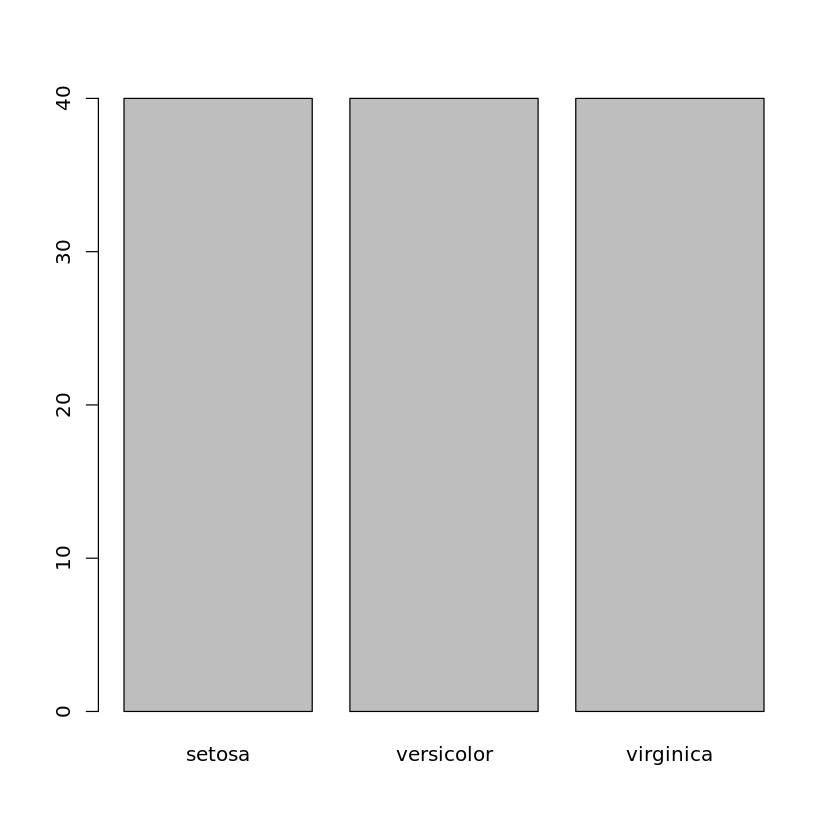

In [16]:
plot(y)

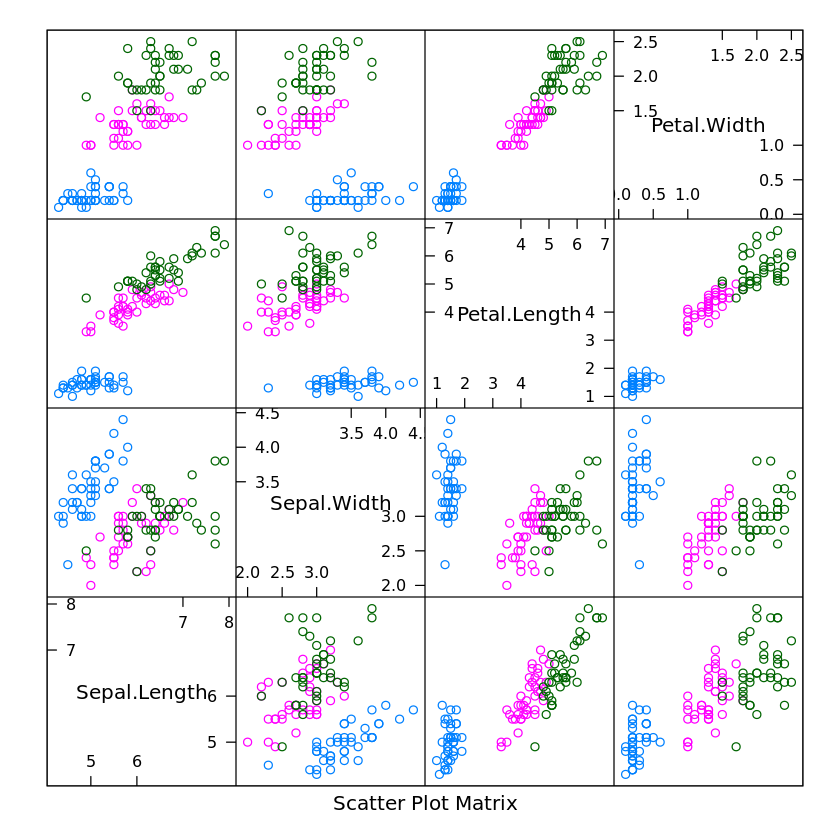

In [28]:
#scatterplot matrix
featurePlot(x=x, y=y, plot="pairs")

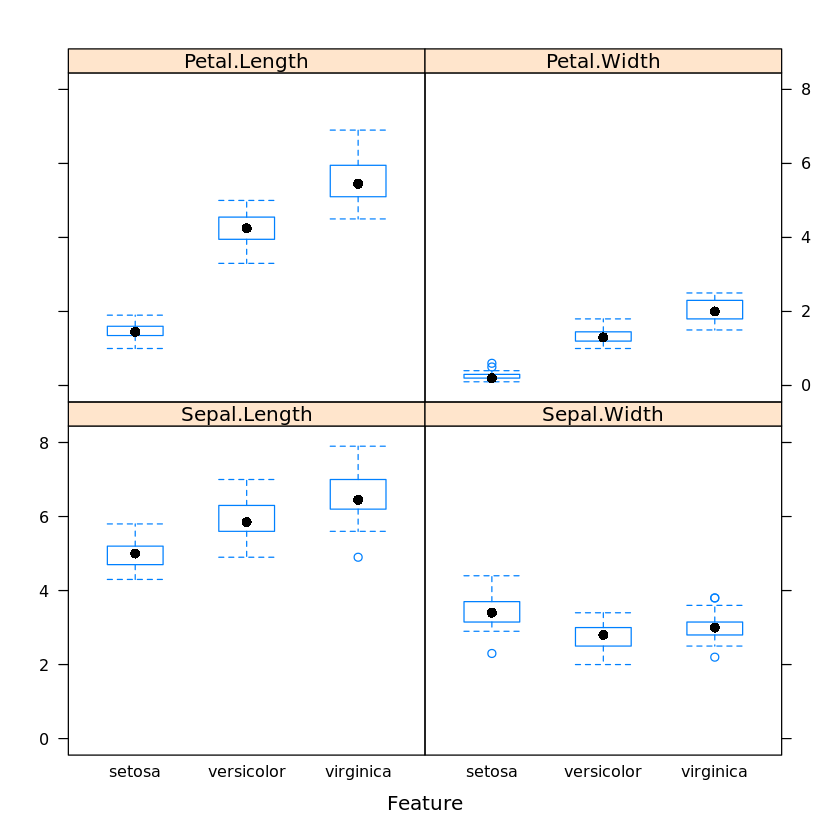

In [22]:
featurePlot(x=x, y=y, plot="box")

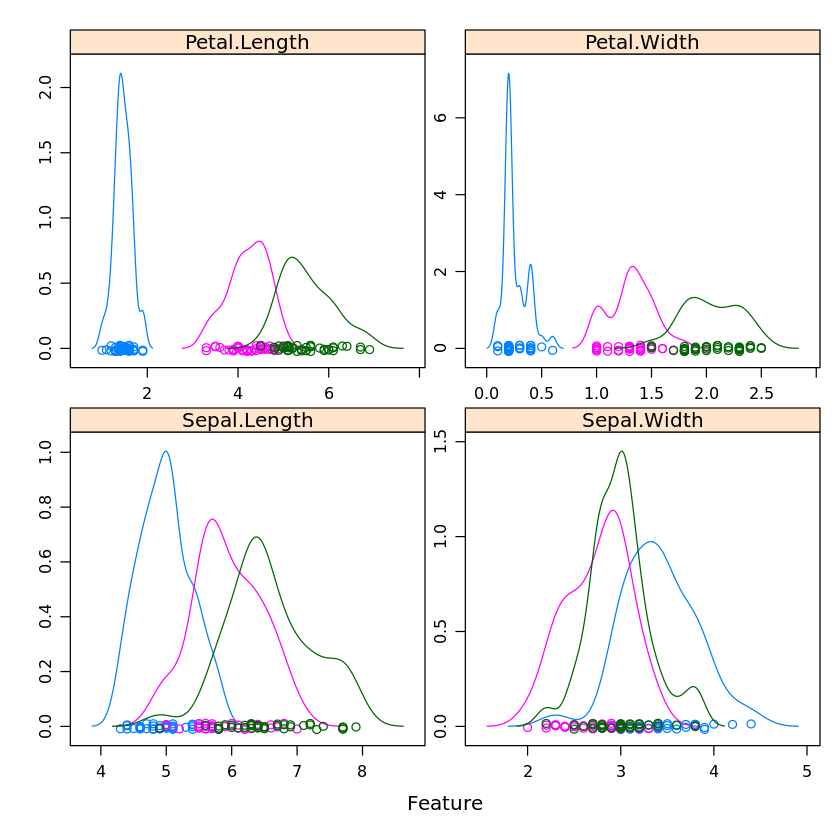

In [23]:
#separation by class
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [24]:
#test algorithms
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [29]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

ERROR: Error: package e1071 is required
